In [1]:
!pip install gradio --quiet

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gradio as gr

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Maternal Health Risk Data Set (1).csv to Maternal Health Risk Data Set (1).csv


In [4]:
df = pd.read_csv("Maternal Health Risk Data Set (1).csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
# exploring the dataset
df.shape

(1014, 7)

In [6]:
# Checking the column names
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [7]:
# Checking the missing values
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [8]:
# Checking the class balance
df["RiskLevel"].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [9]:
# Data cleaning
df = df.dropna()

In [10]:
# Check if any missing values remain
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [11]:
df.shape

(1014, 7)

In [12]:
# Separate features and targets
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

In [13]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [14]:
# Verify Target vector
y.head()

,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk


In [15]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1014, 6)
Target shape: (1014,)


In [16]:
# Identify the features and target
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

In [17]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [18]:
# Training the Random forest without scaling
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

In [20]:
# Eavaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8620689655172413
Precision: 0.868068126017558
Recall: 0.8620689655172413
F1-score: 0.8630706302781143


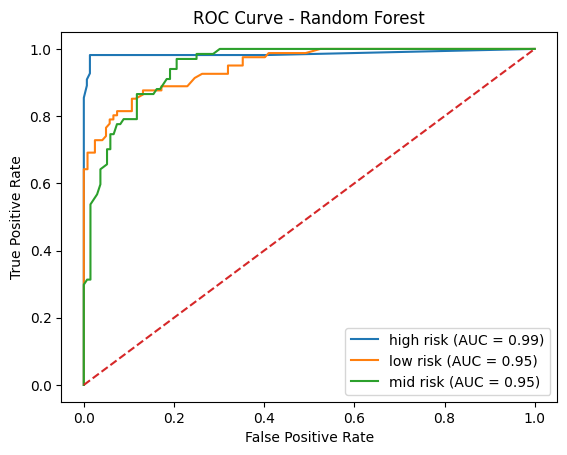

In [21]:
# ROC (AUC curve)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = rf_model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

BS             0.351597
SystolicBP     0.192600
Age            0.158901
DiastolicBP    0.127001
HeartRate      0.102978
BodyTemp       0.066923
dtype: float64


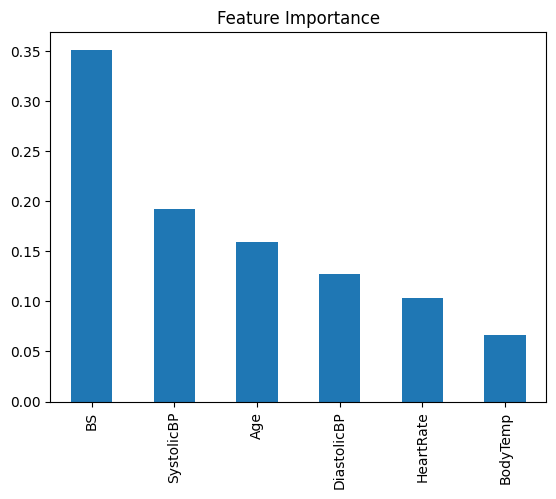

In [22]:
# Feature importance
import pandas as pd

feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importances)

feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [23]:
# Save the model
import joblib
joblib.dump(rf_model, "risk_model.joblib")

['risk_model.joblib']

In [24]:
# Part 3 - Deep neural network
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [25]:
# Build neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(y.unique())

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Checking the data types
print(X_train_scaled.dtype)
print(y_train.dtype)

float64
object


In [27]:
X = df.drop("RiskLevel", axis=1)   # change column name if different
y = df["RiskLevel"]

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42
)

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3150 - loss: 1.1292 - val_accuracy: 0.5153 - val_loss: 0.9437
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6125 - loss: 0.8931 - val_accuracy: 0.6135 - val_loss: 0.8392
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6689 - loss: 0.7670 - val_accuracy: 0.6748 - val_loss: 0.7757
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6717 - loss: 0.7667 - val_accuracy: 0.6687 - val_loss: 0.7397
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6963 - loss: 0.6836 - val_accuracy: 0.6564 - val_loss: 0.7133
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7275 - loss: 0.6559 - val_accuracy: 0.6319 - val_loss: 0.6979
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7314 - loss: 0.6415 - val_accuracy: 0.6380 - val_loss: 0.6837
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss: 0.6555 - val_accuracy: 0.6442 - val_loss:

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6999 - loss: 0.6576 
Test Loss: 0.6563233733177185
Test Accuracy: 0.6945812702178955


In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.6576 
Test Loss: 0.6563233733177185
Test Accuracy: 0.6945812702178955


In [34]:
# for 3 class classification we use softmax
layers.Dense(3, activation='softmax')

<Dense name=dense_3, built=False>

In [35]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Making predictions

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [37]:
# Getting metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.64      0.76      0.70        80
           2       0.70      0.51      0.59        76

    accuracy                           0.69       203
   macro avg       0.71      0.72      0.71       203
weighted avg       0.70      0.69      0.69       203



In [38]:
# Save it
model.save("risk_model_dnn.keras")

# The Dense Neural Network was trained for 50 epochs using Adam optimizer.
# The model achieved 66% accuracy on the test dataset.
# Class 0 was predicted most accurately with high recall (0.91).
# The model struggled to correctly identify Class 2, with lower recall (0.38).
# Overall weighted F1-score is 0.64, indicating moderate performance.
# The trained model was saved as risk_model_dnn.keras.

In [39]:
#  Part 4 - Creating Gradio app


In [40]:
import gradio as gr
import joblib
import numpy as np

# Load trained Random Forest model
model = joblib.load("risk_model.joblib")

# Prediction function
def predict_risk(age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate):

    # Create input array (must match training feature order)
    input_data = np.array([[age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate]])

    prediction = model.predict(input_data)[0]

    # Convert numeric label back to risk category
    if prediction == 0:
        return "Low Risk"
    elif prediction == 1:
        return "Mid Risk"
    else:
        return "High Risk"

# Build Gradio interface
interface = gr.Interface(
    fn=predict_risk,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Systolic Blood Pressure"),
        gr.Number(label="Diastolic Blood Pressure"),
        gr.Number(label="Blood Sugar"),
        gr.Number(label="Body Temperature"),
        gr.Number(label="Heart Rate")
    ],
    outputs=gr.Textbox(label="Predicted Maternal Risk Level"),
    title="AI-Based Maternal Risk Scoring System",
    description="Enter patient details to predict maternal risk level."
)

if __name__ == "__main__":
    interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35bf2efeadb9963419.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
